## Customer Churn


In [34]:
import numpy as np # array operations
import pandas as pd # data processing
import matplotlib.pyplot as plt # visuals
import seaborn as sns # visuals
# import warnings
# # warnings.filterwarnings("ignore") # suppress warnings for readability

In [35]:
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/18e7X8-KyzlX6K1P8sujnVDVtERgsWD9P/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
churn = pd.read_csv(csv_raw)
churn

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,no,no,yes,...,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3329,68,0,231.1,153.4,191.3,9.6,3,no,no,no,...,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3330,28,0,180.8,288.8,191.9,14.1,2,no,no,no,...,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3331,184,0,213.8,159.6,139.2,5.0,2,no,yes,no,...,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


### 1. Data Exploration

#### 1.a. Determine the shape of the data.

In [36]:
# find the shape of the churn data set.
churn.shape

(3333, 21)

#### 1.b. What do the numbers ```(3333, 21)``` tell you?
3333 rows     
21 columns (features, attributes)


#### 1.c. Deterimine whether or not there are any missing values.

In [37]:
churn.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

#### 1.d. Determine the count of each of the Churn  (target variable) categories ('yes', 'no'). Use the ```value_counts()``` method.

In [38]:
# separate churn
churn['Churn'].value_counts()

Churn
no     2850
yes     483
Name: count, dtype: int64

#### 1.e. Create a histogram of the 'Account_Length'. Use the Seaborn `distplot()` method.

<Axes: xlabel='Account_Length', ylabel='Count'>

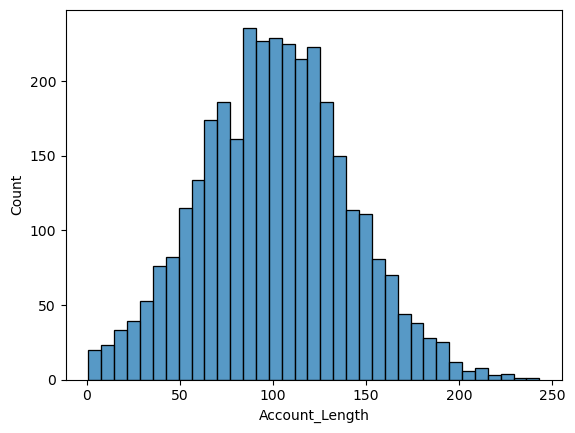

In [39]:
import matplotlib as plt
import seaborn as sns

sns.histplot(churn['Account_Length'])

#### 1.f. Create a boxplot of the Account_Length by Churn status.

<Axes: xlabel='Churn', ylabel='Account_Length'>

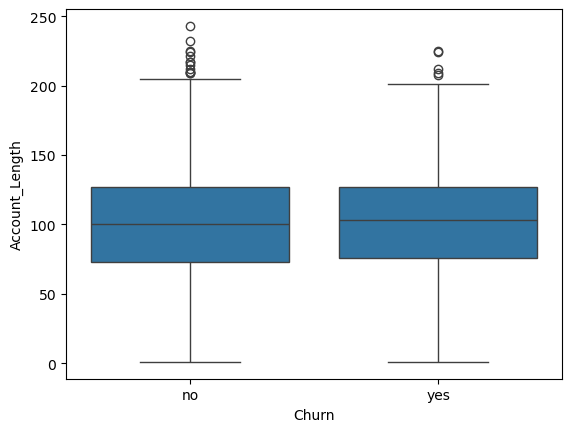

In [40]:
sns.boxplot(x='Churn', y='Account_Length', data=churn)

#### 1.g. Describe any patterns in Churn based on tenure.
The distribution of Account Length appears nearly identical for both churned and non-churned customers.

1.	Median Values: The median (central line in the box) for both groups is very close, indicating that the tenure of customers who churned and those who did not churn is quite similar.
2.	Interquartile Range (IQR): The spread of the middle 50% of the data (the box) is also similar for both groups.
4.	Outliers: There are outliers in both groups, indicating that some customers have significantly longer account lengths. Churners with long tenure could indicate dissatisfaction even after a long commitment.

> There does not seem to be a strong relationship between tenure (Account Length) and Churn because customers with both short and long tenures appear to have a similar likelihood of churning. Therefore, tenure alone may not be a strong predictor of churn in this dataset, other features (e.g., pricing, customer service, plan type) may play a more critical role in predicting churn.


### 2. Data Preprocessing

#### 2.a. Determine the data types for all of the variables in the churn data set. Use the `dtypes` attribute.

In [41]:
churn.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

#### 2.b. Based on the results above, which 5 variables require modification before a model can be built from this data set?

1. `Churn` - Converted 'yes'/'no' to 1/0.
2. `Intl_Plan` - Converted 'yes'/'no' to 1/0.
3. `Vmail_Plan` - Converted 'yes'/'no' to 1/0.
4. `State` - Created dummy variables for each state.
5. `Phone` - Removed from the dataset.

What do the ```Churn``` values look like?

In [42]:
churn['Churn'].head()

0    no
1    no
2    no
3    no
4    no
Name: Churn, dtype: object

Replace all of the ```'no'``` values with 0 and all of the ```'yes'``` values with 1.

In [43]:
churn['Churn']=churn['Churn'].replace({'no':0, 'yes':1})
churn['Churn'].head()

/var/folders/ln/y2zb_fq101s1gcvy6lnz_0tw0000gn/T/ipykernel_63650/3989637536.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn['Churn']=churn['Churn'].replace({'no':0, 'yes':1})


0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

What do the ```'Intl_Plan'``` values look like?

In [44]:
churn['Intl_Plan'].head()

0     no
1     no
2     no
3    yes
4    yes
Name: Intl_Plan, dtype: object

Replace all of the ```'no'``` values with 0 and all of the ```'yes'``` values with 1.

In [45]:
churn['Intl_Plan']=churn['Intl_Plan'].replace({'no':0, 'yes':1})
churn['Intl_Plan'].head()

/var/folders/ln/y2zb_fq101s1gcvy6lnz_0tw0000gn/T/ipykernel_63650/818620598.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn['Intl_Plan']=churn['Intl_Plan'].replace({'no':0, 'yes':1})


0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

#### 2.c. What do the ```'Vmail_Plan'``` values look like? Examine the first few rows with the `head()` method.

In [46]:
churn['Vmail_Plan'].head()

0    yes
1    yes
2     no
3     no
4     no
Name: Vmail_Plan, dtype: object

#### 2.d. Replace all of the ```'no'``` values with 0 and all of the ```'yes'``` values with 1 for the ```'Vmail_Plan'``` data.

In [47]:
churn['Vmail_Plan']=churn['Vmail_Plan'].replace({'no':0, 'yes':1})
churn['Vmail_Plan'].head()

/var/folders/ln/y2zb_fq101s1gcvy6lnz_0tw0000gn/T/ipykernel_63650/3764235833.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn['Vmail_Plan']=churn['Vmail_Plan'].replace({'no':0, 'yes':1})


0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64

Re-examine the data types of the churn data.

In [48]:
churn.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn               int64
Intl_Plan           int64
Vmail_Plan          int64
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

What do the ```'State'``` values look like?

In [49]:
churn['State'].head()

0    KS
1    OH
2    NJ
3    OH
4    OK
Name: State, dtype: object

Use the Pandas ```get_dummies``` method to create a column of indicators for each state.

In [50]:
churn=pd.get_dummies(data=churn, columns=['State'], drop_first=True)
churn.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,False,False,False,False,False,False,False,False,False,False
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,False,False,False,False,False,False,False,False,False,False


#### 2.e. Remove the `Phone` variable from the churn data. Use the Pandas `drop()` method.

In [51]:
# drop Phone column
churn.drop(['Phone'], axis=1, inplace=True)

Examine the first few rows of the data set.

In [52]:
churn.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,False,False,False,False,False,False,False,False,False,False
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,False,False,False,False,False,False,False,False,False,False


### 3. Attribute Selection (abbreviated)

Find the correlations for the quantitative variables.

In [53]:
corr=churn[['Account_Length','Vmail_Message','Day_Mins','Eve_Mins','Night_Mins','Intl_Mins','CustServ_Calls','Day_Calls','Day_Charge','Eve_Calls','Eve_Charge','Night_Calls','Night_Charge','Intl_Calls','Intl_Charge']].corr()
corr

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666
Day_Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094
Eve_Calls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674


#### 3.a. Create a heatmap of the correlations using the Seaborn `heatmap()` method.

<Axes: >

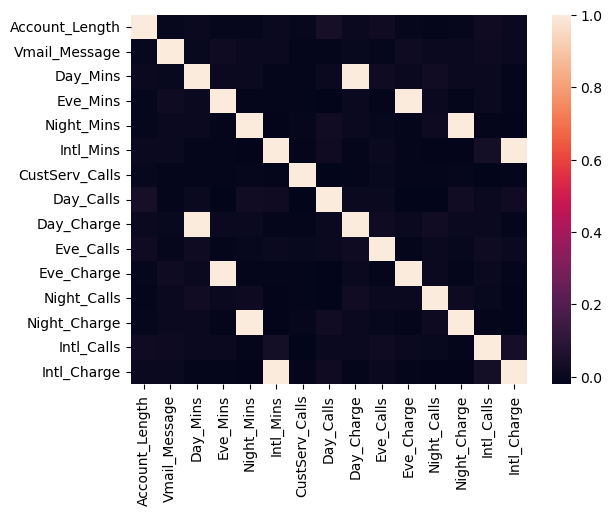

In [54]:
import seaborn as sns
sns.heatmap(corr)

#### 3.b. Based on the correlation analysis, which variables appear to be the most closely associated?

- `Day_Mins` and `Day_Charge`
- `Eve_Mins` and `Eve_Charge`
- `Night_Mins` and `Night_Charge`
- `Intl_Mins` and `Intl_Charge`

These pairs of variables have high correlation coefficients, indicating a strong linear relationship between them.

#### 3.c. What could be done to eliminate redundancy in the data?

1. **Remove Highly Correlated Features**: Since highly correlated features provide similar information, we can remove one of the features from each pair of highly correlated features. For example, we can remove `Day_Charge`, `Eve_Charge`, `Night_Charge`, and `Intl_Charge` as they are highly correlated with `Day_Mins`, `Eve_Mins`, `Night_Mins`, and `Intl_Mins` respectively.

> Advanced techniques to eliminate redundancy in the data include:   

2. **Feature Selection**: Use feature selection techniques such as Recursive Feature Elimination (RFE) or feature importance from models like Random Forest to identify and retain only the most important features.

3. **Dimensionality Reduction**: Apply dimensionality reduction techniques like Principal Component Analysis (PCA) to reduce the number of features while retaining most of the variance in the data.


### 4. Building the Model

Separate the collection of feature variables from the target variable.

#### 4.a. Use the Pandas `drop()` method to remove the `Churn` data from the churn data set and store the results as `features`.

In [55]:
features=churn.drop(['Churn'], axis=1)

#### 4.b. Store the churn Churn data as `target`.

In [56]:
target=churn['Churn']

#### 4.c. Create the four data sets `X_train, X_test, y_train, y_test` using the `train_test_split` method from `sklearn`.

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#### 4.d. Build a Logistic regression model by fitting this model to the X and y training data.

In [58]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(X_train, y_train)

/opt/anaconda3/envs/conda_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 4.e. Use the classifier to predict the target values based on the X testing data.

In [ ]:
# Make predictions using the collection of featuress reserved in X_test
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 5. Model Evaluation

#### 5.a. Use the `score()` method with the testing data (`X_test` and `y_test`) to determine the model's accuracy.

In [60]:
clf_score=clf.score(X_test, y_test)
print(clf_score)

0.8500749625187406


#### 5.b. Briefly interpret the score of this classifier.

The score of the classifier `0.8500749625187406`, represents the accuracy of the model, meaning that the model correctly identifies whether a customer will churn or not 85% of the time.

While this suggests that the model is performing well, accuracy alone may not be sufficient, especially if the dataset is imbalanced (e.g., more non-churners than churners). Further evaluation using precision, recall, F1-score, and ROC-AUC would provide a more comprehensive understanding of the model’s performance.